In [242]:
import pandas as pd
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')

In [243]:
# df = df[df['trip_type']==2]
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


In [244]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       36047
RatecodeID               36047
PULocationID                 0
DOLocationID                 0
passenger_count          36047
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                76518
improvement_surcharge        0
total_amount                 0
payment_type             36047
trip_type                36047
congestion_surcharge     36047
duration                     0
dtype: int64

In [245]:
# ignoring columns with missing values
df = df.drop(['ehail_fee','store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge'], axis=1)

In [246]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.01,5.5,0.5,0.5,0.00,0.0,0.3,6.80,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,2.53,10.0,0.5,0.5,2.81,0.0,0.3,16.86,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.12,6.0,0.5,0.5,1.00,0.0,0.3,8.30,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,168,75,1.99,8.0,0.5,0.5,0.00,0.0,0.3,9.30,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,0.00,-52.0,0.0,-0.5,0.00,0.0,-0.3,-52.80,0.066667


In [247]:
# cats = df[['VendorID','PULocationID','DOLocationID']]
# nums = df.drop(cats, axis=1)
# nums = nums.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'], axis=1)

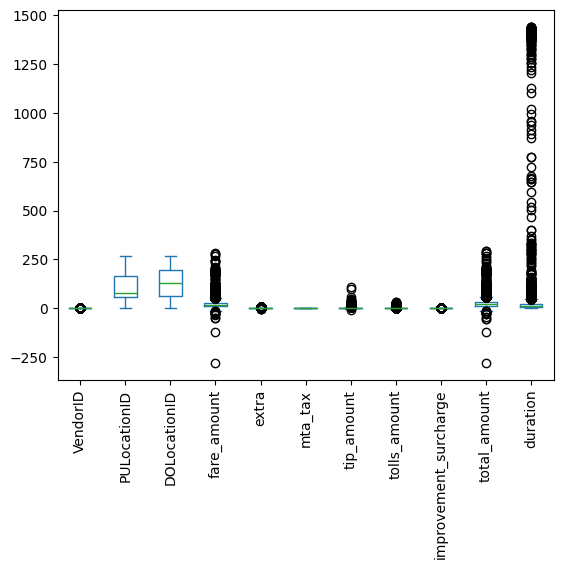

In [248]:
import matplotlib.pyplot as plt
df.drop('trip_distance', axis=1).plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [249]:
df['delta'] = (df['total_amount'] - df['fare_amount'] - df['extra'] - df['mta_tax'] - df['tip_amount'] - df['tolls_amount'] - df['improvement_surcharge']).round(2)

In [250]:
df['extra'] = df['extra'] + df['delta']

In [251]:
df = df.drop(['total_amount', 'delta'], axis=1)

In [ ]:
df = df[df['trip_distance']<=150]
df = df[df['fare_amount']>=0]

In [258]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.01,5.50,0.50,0.5,0.00,0.00,0.3,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,2.53,10.00,3.25,0.5,2.81,0.00,0.3,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.12,6.00,0.50,0.5,1.00,0.00,0.3,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,168,75,1.99,8.00,0.50,0.5,0.00,0.00,0.3,7.083333
5,2,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,0.00,52.00,0.00,0.5,0.00,0.00,0.3,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,81,90,17.63,56.23,2.75,0.0,0.00,6.12,0.3,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,35,213,18.36,46.66,0.00,0.0,12.20,6.12,0.3,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,74,69,2.50,18.95,2.75,0.0,0.00,0.00,0.3,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,168,215,14.48,48.87,2.75,0.0,0.00,6.12,0.3,27.000000


<Axes: >

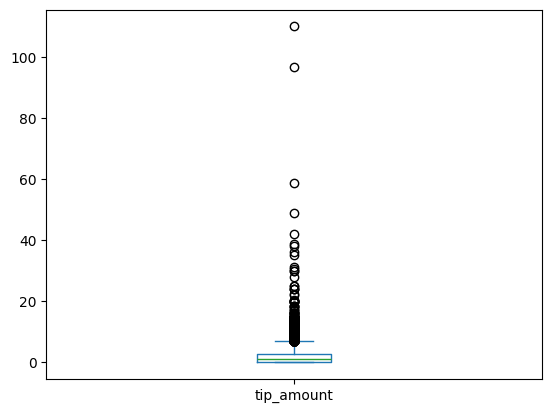

In [266]:
df['tip_amount'].plot(kind='box')
# df['mta_tax'].hist()
